# **Petunjuk TTS**

Silakan simpan file ke dalam bentuk **TTS_NIM.ipynb**. Tuliskan koding untuk dapat menampilkan hasil seperti yang diminta. Setelah selesai mengerjakan, silakan unggah ke GClass. Jangan sampai terlambat ya...keterlambatan mengakibatkan pengurangan nilai TTS.

Have fun!

### **1. Import Libraries**

In [53]:
# Silakan import librari yang kalian butuhkan (pandas, numpy, matplotlib, seaborn, dan missingno)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno




In [54]:
# Ambil dataset dari (https://github.com/adelnehme/python-for-spreadsheet-users-webinar/blob/master/datasets/airbnb.csv?raw=true) dan simpan dengan nama variabel data
df =pd.read_csv('airbnb.csv')


In [56]:
# Lihat 5 data teratas pada DataFrame "data"
df.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","(40.63222, -73.93398)",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","(40.78761, -73.96862)",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","(40.79169, -73.97498)",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","(40.71884, -73.98354)",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23


In [57]:
# Cek tipe data dalam "data"
type(df.dtypes)

pandas.core.series.Series

### **2. Membersihkan Data**

**Challenge 1**: Ganti `coordinates` dengan kolom `latitude` dan `longitude`

In [97]:
# Hapus tanda "(" dan ")" dari kolom coordinates
data['coordinates'] = data['coordinates'].str.replace("(", "")
data['coordinates'] = data['coordinates'].str.replace(")", "")

C:\Users\My Windows\AppData\Local\Temp\ipykernel_2896\3918226601.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace("(", "")
C:\Users\My Windows\AppData\Local\Temp\ipykernel_2896\3918226601.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  data['coordinates'] = data['coordinates'].str.replace(")", "")


In [98]:
# Cetak 5 data paling atas dari kolom coordinates
data ['coordinates'].head()

0    40.63222, -73.93398
1    40.78761, -73.96862
2     40.7007, -73.99517
3    40.79169, -73.97498
4    40.71884, -73.98354
Name: coordinates, dtype: object

In [99]:
# Lakukan split data di kolom coordinates, beri nama lat_long
lat_long = data['coordinates'].str.split(",", expand= True)

In [100]:
# Buat supaya latitude berisi nilai lat_long[0] dan longitude berisi nilai lat_long[1]
data['latitude'] = lat_long[0]
data['longitude'] = lat_long[1]

In [101]:
# Cetak data
data.head(10)

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire home/apt,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire home/apt,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.7007,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire home/apt,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354
5,5,271954,Beautiful brownstone apartment,1423798,Aj,"Manhattan, Greenwich Village","40.73388, -73.99452",Entire home/apt,150$,203,2019-06-20,2.22,300,4.478396,243.6,0.743500,2018-12-15,40.73388,-73.99452
6,6,33473567,Hamilton Heights Full Floor Garden Apt,33388853,Christine,"Manhattan, Harlem","40.8309, -73.94308000000002",Entire home/apt,200$,0,NaN,NaN,219,NaN,NaN,NaN,2018-05-05,40.8309,-73.94308000000002
7,7,14218742,Luxury/3bedroom/3bthrm/Privateprkng/beach/rstrnts,78824908,Ilona,"Brooklyn, Sheepshead Bay","40.58531, -73.93811",Entire home/apt,224$,2,2018-06-22,0.08,353,4.091228,2.4,0.690393,2017-12-17,40.58531,-73.93811
8,8,15125599,Beautiful One Bedroom Apartment Near Central Park,3191545,Kyle,"Manhattan, Theater District","40.761, -73.98522",Entire home/apt,169$,5,2017-06-25,0.15,365,3.562947,6.0,0.704538,2016-12-20,40.761,-73.98522
9,9,24553891,Enjoy all of Manhattan. Big Apple! A Mini-MOMA!,68557372,Shannon,"Manhattan, Harlem","40.80667, -73.95182",Entire home/apt,75$,8,2019-04-24,0.66,9,4.695769,9.6,0.750073,2018-10-19,40.80667,-73.95182


In [102]:
# Konversi nilai latitude dan longitude menjadi FLOAT
data['latitude'] = data['latitude'].astype (float)
data['longitude'] = data['longitude'].astype (float)

In [104]:
# Cek tipe data sekali lagi
data.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

In [107]:
# Hapus kolom coordinates
data['coordinates'].head(12)

0             40.63222, -73.93398
1             40.78761, -73.96862
2              40.7007, -73.99517
3             40.79169, -73.97498
4             40.71884, -73.98354
5             40.73388, -73.99452
6     40.8309, -73.94308000000002
7             40.58531, -73.93811
8               40.761, -73.98522
9             40.80667, -73.95182
10            40.70103, -73.91901
11             40.6688, -73.74384
Name: coordinates, dtype: object

In [109]:
# Cetak data sekali lagi
data.dtypes

Unnamed: 0              int64
listing_id              int64
name                   object
host_id                 int64
host_name              object
neighbourhood_full     object
coordinates            object
room_type              object
price                  object
number_of_reviews       int64
last_review            object
reviews_per_month     float64
availability_365        int64
rating                float64
number_of_stays       float64
5_stars               float64
listing_added          object
latitude              float64
longitude             float64
dtype: object

**Challenge 2**: Hapus `$` dari kolom `price` dan konversi ke `float`

In [125]:
# Hapus tanda dolar ($) dari kolom price sebelum nantinya akan kita konversi ke tipe data FLOAT
data['price'] = data['price'].str.strip("$")

In [127]:
# Cetak untuk melihat apakah sudah terjadi perubahan pada kolom price
print(data.price.head())

0     45
1    135
2    150
3     86
4    160
Name: price, dtype: object


In [128]:
# Konversi kolom price ke bentuk FLOAT
data['price'] = data['price'].astype (float)

In [129]:
# Hitung nilai mean dari kolom price setelah dikonversi
data_mean = data['price'].mean()
data_mean

150.90512217564665

<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

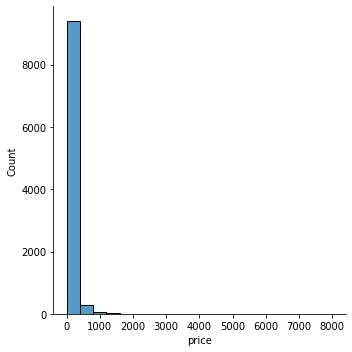

In [135]:
# Buat visualisasi distribusi dari kolom prices
sns.displot(data['price'], bins = 20)
plt.plot

**Challenge 3**: Kita buat supaya kolom `room_type` benar-benar rapi secara kategori.

In [121]:
# Cetak supaya tahu kategori apa saja yang ada di kolom `room_type`
data['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [116]:
# Buat supaya semua berubah menjadi huruf kecil
data['room_type'] = data['room_type'].str.lower()
data ['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home', '   shared room      '], dtype=object)

In [122]:
# Buat supaya tidak ada spasi di awal dan akhir
data['room_type'] = data['room_type'].str.strip()
data ['room_type'].unique()

array(['private room', 'entire home/apt', 'private', 'shared room',
       'home'], dtype=object)

In [123]:
# Ganti menjadi kategori 'Shared room', 'Entire place', 'Private room' dan 'Hotel room'
mapping = {
    'private room' : 'Private Room',
    'private' : 'Private Room',
    'entire home/apt' : 'Entire Place',
    'shared room' : 'Shared Room',
    'home': 'Hotel Room'
}

for key in mapping.keys():
    data['room_type'] = data['room_type'].str.replace(key, mapping[key])

In [124]:
# Cek 5 data teratas untuk melihat perubahan yang terjadi
data.head()

,Unnamed: 0,listing_id,name,host_id,host_name,neighbourhood_full,coordinates,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands","40.63222, -73.93398",Private Room,45$,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side","40.78761, -73.96862",Entire Place,135$,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights","40.7007, -73.99517",Entire Place,150$,0,NaN,NaN,65,NaN,NaN,NaN,2018-08-15,40.70070,-73.99517
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side","40.79169, -73.97498",Entire Place,86$,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side","40.71884, -73.98354",Private Room,160$,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354


**Challenge 4**: Kita bersihkan **missing data**

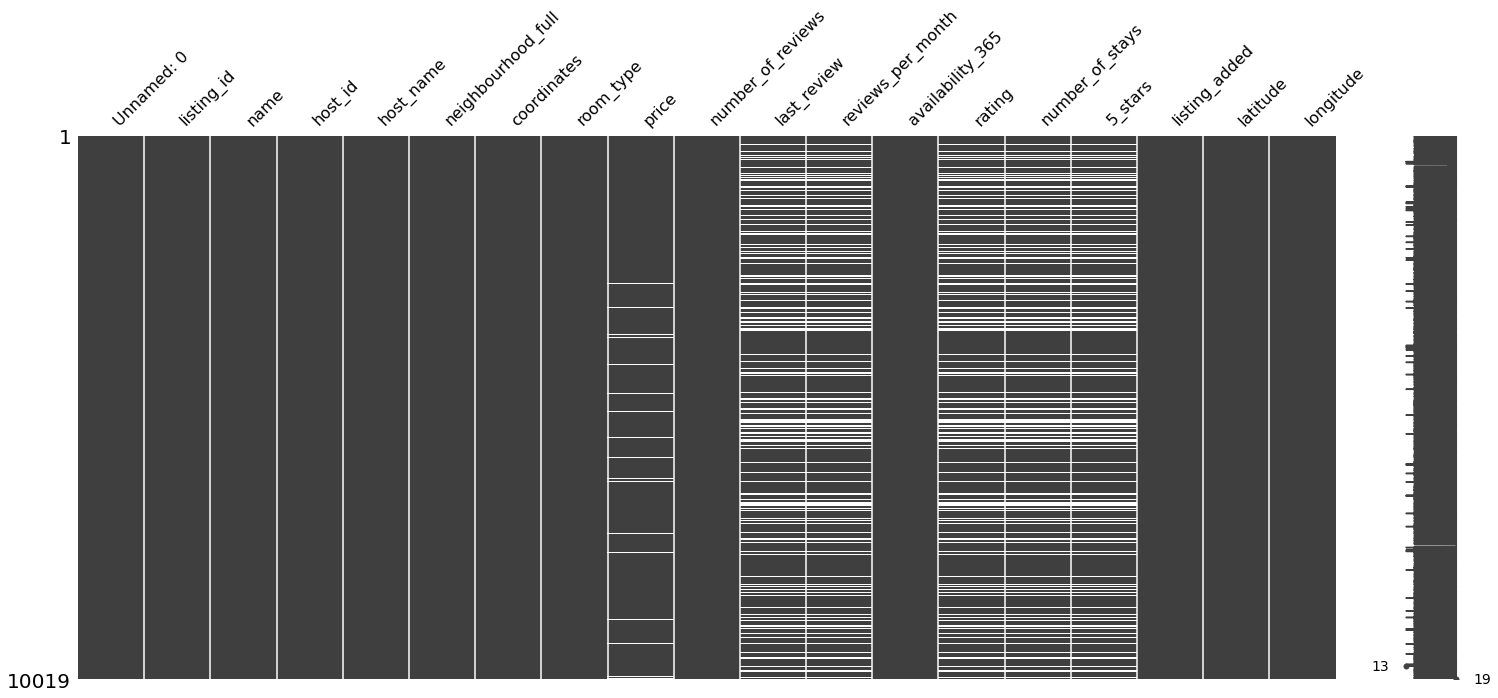

In [139]:
# Visualisasi missingness 
msno.matrix(data)
plt.show()

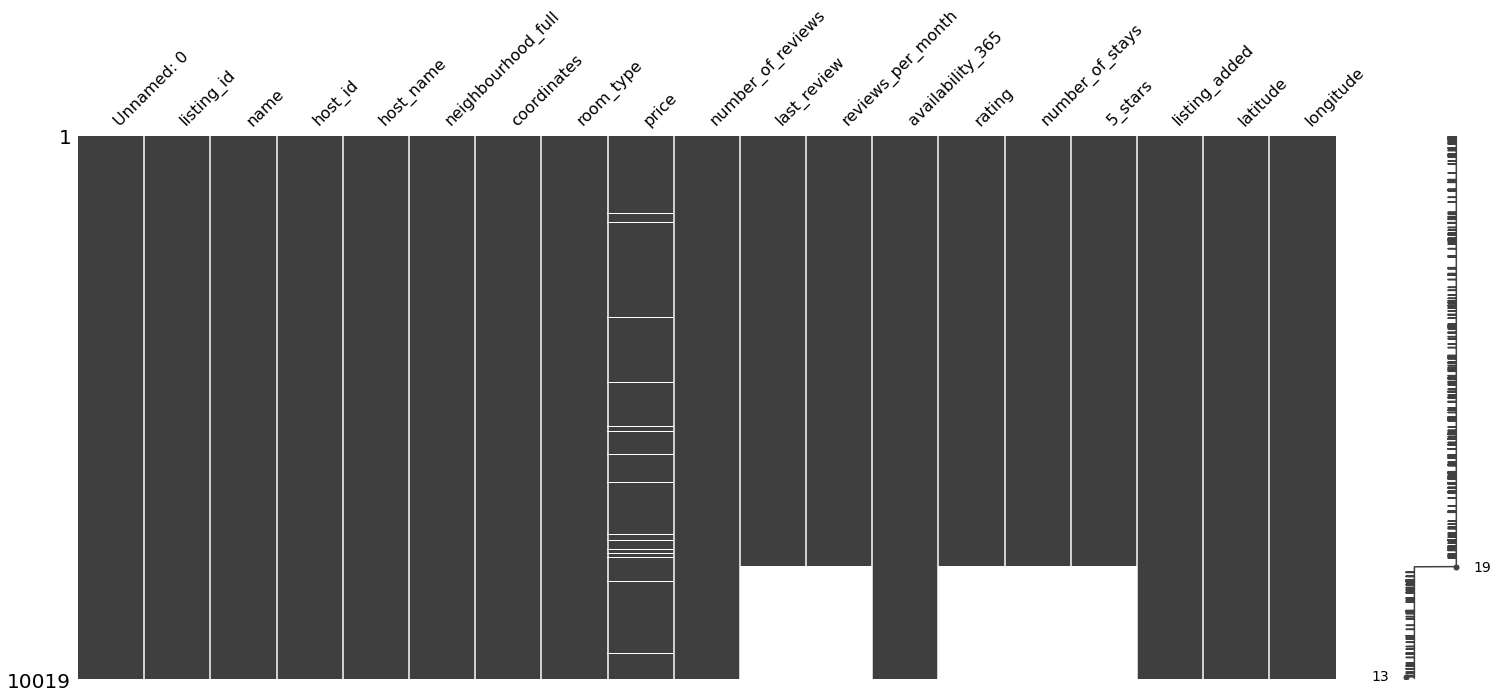

In [141]:
# Visualisasikan missingness berdasarkan rating
msno.matrix(data.sort_values( by = 'rating')) 
plt.show()

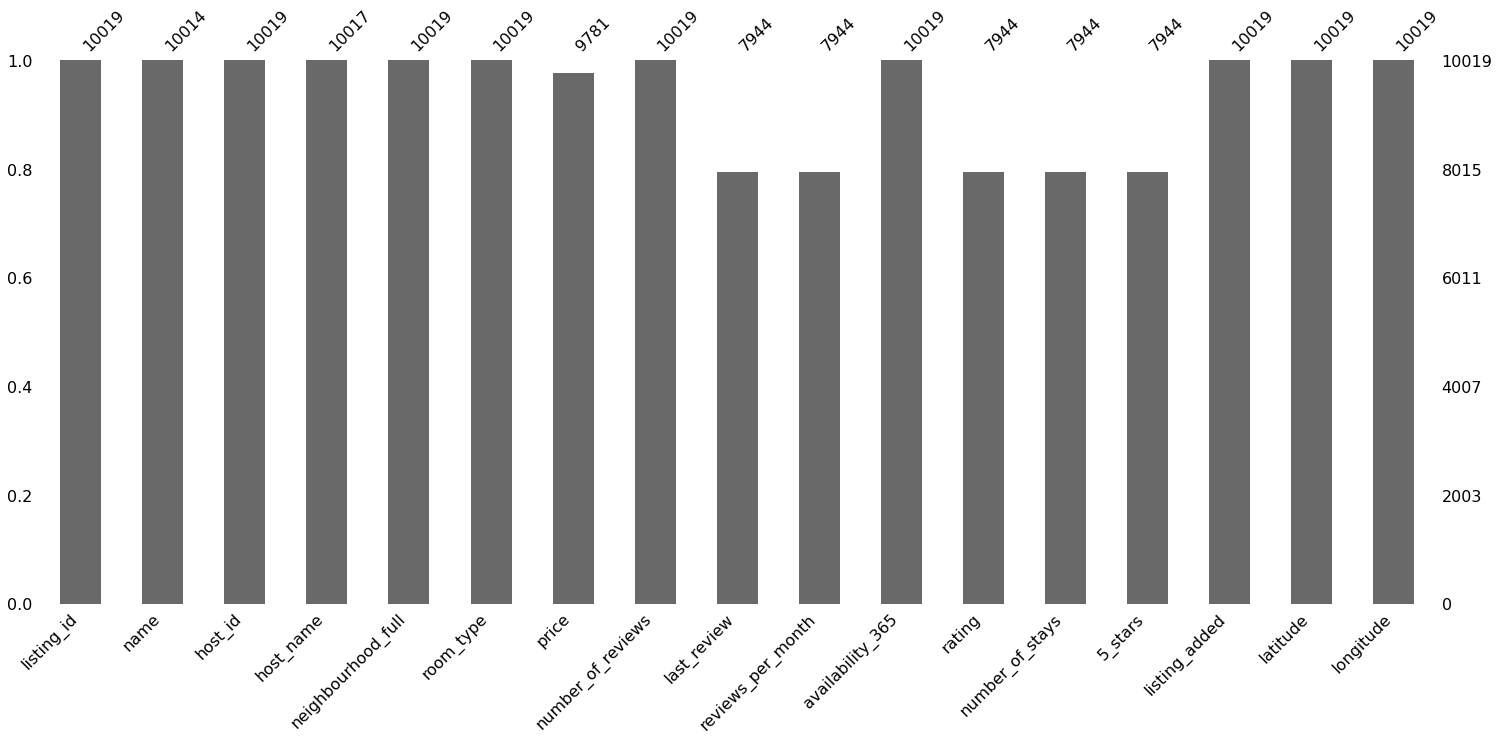

In [62]:
# Buat dalam bentuk barplot


In [63]:
# Cek DataFrame yang ada missing values di kolom rating, number_of_stays, 5_stars, reviews_per_month


,listing_id,host_id,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,latitude,longitude
count,2.075000e+03,2.075000e+03,2028.000000,2075.0,0.0,2075.000000,0.0,0.0,0.0,2075.000000,2075.000000
mean,2.274238e+07,8.022455e+07,191.553748,0.0,NaN,104.531566,NaN,NaN,NaN,40.732074,-73.956771
std,1.123730e+07,8.663163e+07,316.186639,0.0,NaN,138.266525,NaN,NaN,NaN,0.051168,0.041065
min,6.358800e+04,1.475100e+04,0.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.527000,-74.209410
25%,1.232923e+07,1.224305e+07,70.000000,0.0,NaN,0.000000,NaN,NaN,NaN,40.697845,-73.985185
50%,2.345182e+07,4.040116e+07,120.000000,0.0,NaN,7.000000,NaN,NaN,NaN,40.727790,-73.960940
75%,3.400364e+07,1.333498e+08,205.250000,0.0,NaN,211.000000,NaN,NaN,NaN,40.763480,-73.939540
max,3.648724e+07,2.741034e+08,5250.000000,0.0,NaN,365.000000,NaN,NaN,NaN,40.911690,-73.727310


In [64]:
# Lakukan imputasi untuk missing data


In [65]:
# Buat kolom baru, beri nama sudah_dinilai


In [66]:
# Cek data


,listing_id,name,host_id,host_name,neighbourhood_full,room_type,price,number_of_reviews,last_review,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added,latitude,longitude,sudah_dinilai
0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"Brooklyn, Flatlands",Private Room,45.0,10,2018-12-12,0.70,85,4.100954,12.0,0.609432,2018-06-08,40.63222,-73.93398,1
1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"Manhattan, Upper West Side",Entire place,135.0,1,2019-06-30,1.00,145,3.367600,1.2,0.746135,2018-12-25,40.78761,-73.96862,1
2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"Brooklyn, Brooklyn Heights",Entire place,150.0,0,NaN,0.00,65,NaN,0.0,0.000000,2018-08-15,40.70070,-73.99517,0
3,6425850,"Spacious, charming studio",32715865,Yelena,"Manhattan, Upper West Side",Entire place,86.0,5,2017-09-23,0.13,0,4.763203,6.0,0.769947,2017-03-20,40.79169,-73.97498,1
4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"Manhattan, Lower East Side",Private Room,160.0,23,2019-06-12,2.29,102,3.822591,27.6,0.649383,2020-10-23,40.71884,-73.98354,1


**Challenge 5**: Hapus kolom-kolom berikut


1.   neighbourhood_full
2.   number_of_reviews
3.   last_review
4.   reviews_per_month
5.   availability_365
6.   number_of_stays
7.   5_stars
8.   listing_added









In [147]:
# Hapus beberapa kolom yang tidak dibutuhkan
hapus = ['neighbourhood_full','number_of_reviews','last_review','reviews_per_month','availability_365','number_of_stays','5_stars','listing_added']
data.drop(hapus, inplace=True, axis=1)

In [148]:
# Tampilkan data
df

,Unnamed: 0,listing_id,name,host_id,host_name,coordinates,room_type,price,number_of_reviews,reviews_per_month,availability_365,rating,number_of_stays,5_stars,listing_added
0,0,13740704,"Cozy,budget friendly, cable inc, private entra...",20583125,Michel,"(40.63222, -73.93398)",Private room,45$,10,0.70,85,4.100954,12.0,0.609432,2018-06-08
1,1,22005115,Two floor apartment near Central Park,82746113,Cecilia,"(40.78761, -73.96862)",Entire home/apt,135$,1,1.00,145,3.367600,1.2,0.746135,2018-12-25
2,2,21667615,Beautiful 1BR in Brooklyn Heights,78251,Leslie,"(40.7007, -73.99517)",Entire home/apt,150$,0,NaN,65,NaN,NaN,NaN,2018-08-15
3,3,6425850,"Spacious, charming studio",32715865,Yelena,"(40.79169, -73.97498)",Entire home/apt,86$,5,0.13,0,4.763203,6.0,0.769947,2017-03-20
4,4,22986519,Bedroom on the lively Lower East Side,154262349,Brooke,"(40.71884, -73.98354)",Private room,160$,23,2.29,102,3.822591,27.6,0.649383,2020-10-23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10014,10014,22307861,Lovely 1BR Harlem apartment,16004068,Rachel,"(40.80379, -73.95257)",Entire home/apt,105$,4,0.21,0,4.757555,4.8,0.639223,2017-11-22
10015,10015,953275,Apartment For Your Holidays in NYC!,4460034,Alain,"(40.79531, -73.9333)",Entire home/apt,125$,50,0.66,188,4.344704,60.0,0.648778,2017-10-31
10016,10016,3452835,"Artsy, Garden Getaway in Central Brooklyn",666862,Amy,"(40.68266, -73.96743000000002)",Entire home/apt,100$,45,0.98,0,3.966214,54.0,0.631713,2016-05-24
10017,10017,23540194,"Immaculate townhouse in Clinton Hill, Brooklyn",67176930,Sophie,"(40.68832, -73.96366)",Entire home/apt,450$,2,0.17,99,4.078581,2.4,0.703360,2018-11-25
